In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive/')

In [79]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Data/new_beach_data.csv")

In [80]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,8/8/2023 11:00,-100000,-100000,NaN,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,8/8/2023 12:00,-100000,-100000,NaN,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,8/8/2023 13:00,-100000,-100000,NaN,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,8/8/2023 14:00,-100000,-100000,NaN,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,8/8/2023 15:00,-100000,-100000,NaN,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   1477 non-null   object 
 1   Measurement Timestamp        1477 non-null   object 
 2   Water Temperature            1477 non-null   int64  
 3   Turbidity                    1477 non-null   int64  
 4   Transducer Depth             0 non-null      float64
 5   Wave Height                  1477 non-null   float64
 6   Wave Period                  1477 non-null   float64
 7   Battery Life                 1477 non-null   float64
 8   Measurement Timestamp Label  1477 non-null   object 
 9   Measurement ID               1477 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 115.5+ KB


In [82]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,1477.0,1477.0,0.0,1477.000000,1477.000000,1477.000000
mean,-100000.0,-100000.0,NaN,0.133636,4.054638,12.768382
std,0.0,0.0,NaN,0.130965,1.618947,0.774183
min,-100000.0,-100000.0,NaN,0.000000,1.200000,9.800000
25%,-100000.0,-100000.0,NaN,0.050000,2.600000,12.200000
50%,-100000.0,-100000.0,NaN,0.100000,3.900000,12.900000
75%,-100000.0,-100000.0,NaN,0.170000,5.700000,13.300000
max,-100000.0,-100000.0,NaN,0.760000,7.300000,14.800000


In [83]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                        0
Measurement Timestamp             0
Water Temperature                 0
Turbidity                         0
Transducer Depth               1477
Wave Height                       0
Wave Period                       0
Battery Life                      0
Measurement Timestamp Label       0
Measurement ID                    0
dtype: int64


Checked that the Transducer Depth column has many null values, hence dropped it.

In [84]:
data.drop(columns='Transducer Depth',inplace=True)

In [85]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1472    False
1473    False
1474    False
1475    False
1476    False
Length: 1477, dtype: bool

In [86]:
data['Measurement Timestamp'] = pd.to_datetime(data['Measurement Timestamp'])

In [87]:
type(data['Measurement Timestamp'])

pandas.core.series.Series

In [88]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500


In [90]:
data.set_index('Measurement Timestamp')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,
2023-08-08 11:00:00,Ohio Street Beach,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
2023-08-08 12:00:00,Ohio Street Beach,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2023-08-08 13:00:00,Ohio Street Beach,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
2023-08-08 14:00:00,Ohio Street Beach,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
2023-08-08 15:00:00,Ohio Street Beach,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500
...,...,...,...,...,...,...,...,...
2023-10-28 18:00:00,Ohio Street Beach,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
2023-10-28 19:00:00,Ohio Street Beach,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
2023-10-28 20:00:00,Ohio Street Beach,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000


In [92]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement Timestamp'])

True

In [93]:
data.columns

Index(['Beach Name', 'Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns:
'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

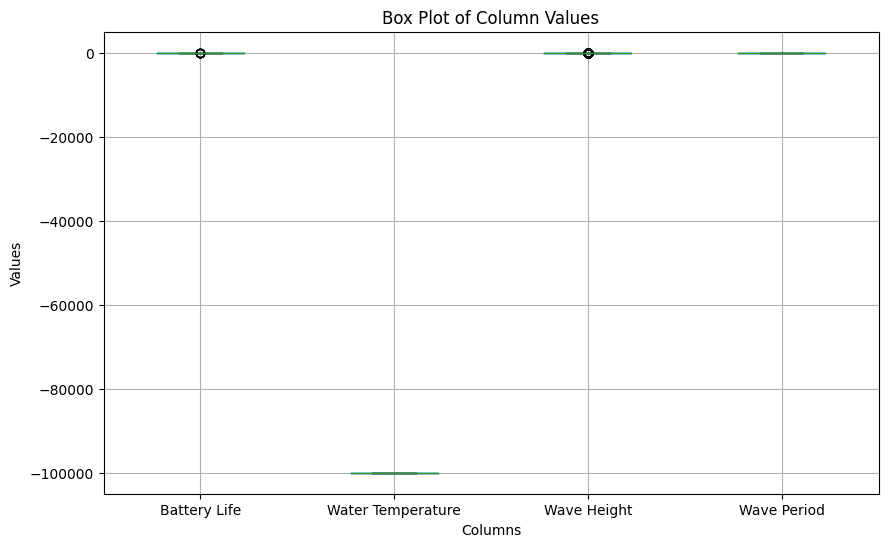

In [94]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [95]:
data = data.drop(data.loc[data['Wave Height']<-999,:].index)

In [97]:
data

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500
...,...,...,...,...,...,...,...,...,...
1472,Ohio Street Beach,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
1473,Ohio Street Beach,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
1474,Ohio Street Beach,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000
1475,Ohio Street Beach,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100


Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [98]:
data1 = data.drop(columns=['Beach Name', 'Measurement Timestamp Label','Measurement ID'])

In [99]:
data1.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2
1,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1
2,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2
3,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2
4,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0


In [100]:
data.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500


In [101]:
data[data['Beach Name'] == 'Ohio Street Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500
...,...,...,...,...,...,...,...,...,...
1472,Ohio Street Beach,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
1473,Ohio Street Beach,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
1474,Ohio Street Beach,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000
1475,Ohio Street Beach,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100


In [105]:
data[data['Beach Name'] == 'Calumet Beach']

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID


### Sorting

In [110]:
data_sorted = data.sort_values(by=['Beach Name','Measurement Timestamp'])
# data_sorted = data.sort_values(by=['Measurement Timestamp','Beach Name'])

In [111]:
data_sorted.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500


In [112]:
data_sorted['Beach Name'].unique()

array(['Ohio Street Beach'], dtype=object)

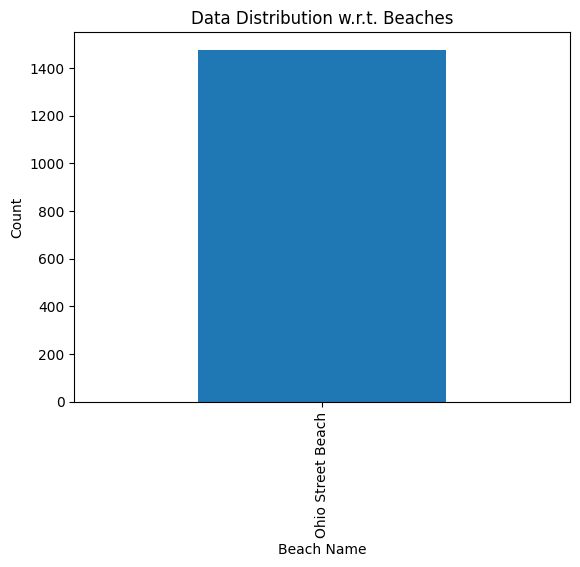

In [113]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [114]:
data_sorted_ohio_b = data_sorted[data_sorted['Beach Name']=='Ohio Street Beach']

In [115]:
data_sorted_ohio_b

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500
...,...,...,...,...,...,...,...,...,...
1472,Ohio Street Beach,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
1473,Ohio Street Beach,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
1474,Ohio Street Beach,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000
1475,Ohio Street Beach,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100


In [116]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted.csv")

In [117]:
data_sorted_ohio_b.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Cleaned/Cleaned and Sorted/data_sorted_ohio_b.csv")

In [118]:
pip install umap-learn

### Encoding:

Doing the encoding using the get_dummies() method in pandas because UMAP does not allow categorical data.

In [150]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_Ohio Street Beach
0,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100,1
1,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200,1
2,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300,1
3,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400,1
4,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500,1
...,...,...,...,...,...,...,...,...,...
1472,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800,1
1473,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900,1
1474,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000,1
1475,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100,1


In [151]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [152]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [153]:
encoded_data.columns

Index(['Measurement Timestamp', 'Water Temperature', 'Turbidity',
       'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID',
       'Beach Name_Ohio Street Beach'],
      dtype='object')

Dropping the columns **Measurement Timestamp Label, Measurement ID**


In [154]:
encoded_data_pre = encoded_data.drop(columns=['Measurement Timestamp Label','Measurement ID'])

In [155]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_Ohio Street Beach
0,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,1
1,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,1
2,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,1
3,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,1
4,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,1
...,...,...,...,...,...,...,...
1472,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,1
1473,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,1
1474,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,1
1475,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,1


###Standardizing the dataset

In [156]:
scaler = StandardScaler()
encoded_data_pre[num_cols] = scaler.fit_transform(encoded_data_pre[num_cols])

##Converting the measurement timestamp to a numeric value:

In [42]:
# timeseries_data = encoded_data_pre['Measurement Timestamp']

# reference_time = timeseries_data.min()

# encoded_data_pre['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60

In [157]:
# Convert datetime to numeric representation
# encoded_data_pre['Measurement Timestamp'] = pd.to_datetime(encoded_data_pre['Measurement Timestamp'])
encoded_data_pre['Measurement Timestamp'] = encoded_data_pre['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [158]:
encoded_data_pre.isna().sum()

Measurement Timestamp           0
Water Temperature               0
Turbidity                       0
Wave Height                     0
Wave Period                     0
Battery Life                    0
Beach Name_Ohio Street Beach    0
dtype: int64

There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [148]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(encoded_data_pre) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

encoded_data_pre=pd.DataFrame(data=np.round(new_array), columns=encoded_data_pre.columns)

In [159]:
encoded_data_pre.head()

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_Ohio Street Beach
0,1.691492e+09,0.0,0.0,-0.180535,0.089819,0.557703,1
1,1.691496e+09,0.0,0.0,-0.104153,0.089819,0.428491,1
2,1.691500e+09,0.0,0.0,-0.104153,0.089819,0.557703,1
3,1.691503e+09,0.0,0.0,-0.180535,-1.084181,0.557703,1
4,1.691507e+09,0.0,0.0,-0.104153,0.089819,0.299279,1


random_state --> This parameter is used to set the random seed for reproducibility

n_neighbors --> This parameter determines the number of nearest neighbors used to construct the local neighborhood for each data point. In UMAP, the algorithm builds a graph representation of the data, and n_neighbors specifies the number of nearest neighbors to consider when constructing the graph. Increasing this value may result in a more global view of the data, while decreasing it may provide a more local perspective.


n_components --> This parameter sets the number of dimensions in the lower-dimensional space to which the data will be projected

min_dist: This parameter controls the minimum distance between points in the lower-dimensional embedding. A higher value of min_dist enforces greater spacing between points, potentially resulting in a clearer visualization

In [160]:
# Apply UMAP to the entire DataFrame
SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 12,
                    n_components = 2,
                    min_dist = 0.5)

# reducer = umap.UMAP(random_state=43)
umap_result = reducer.fit_transform(encoded_data_pre)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [161]:
umap_result

array([[17.444887 , 15.510618 ],
       [17.360394 , 15.599665 ],
       [17.389248 , 15.574696 ],
       ...,
       [ 7.7679877, -5.1528916],
       [ 7.8574347, -5.207599 ],
       [ 7.868906 , -5.1378837]], dtype=float32)

## Finding the patterens with respect to the Measurement Timestamp:

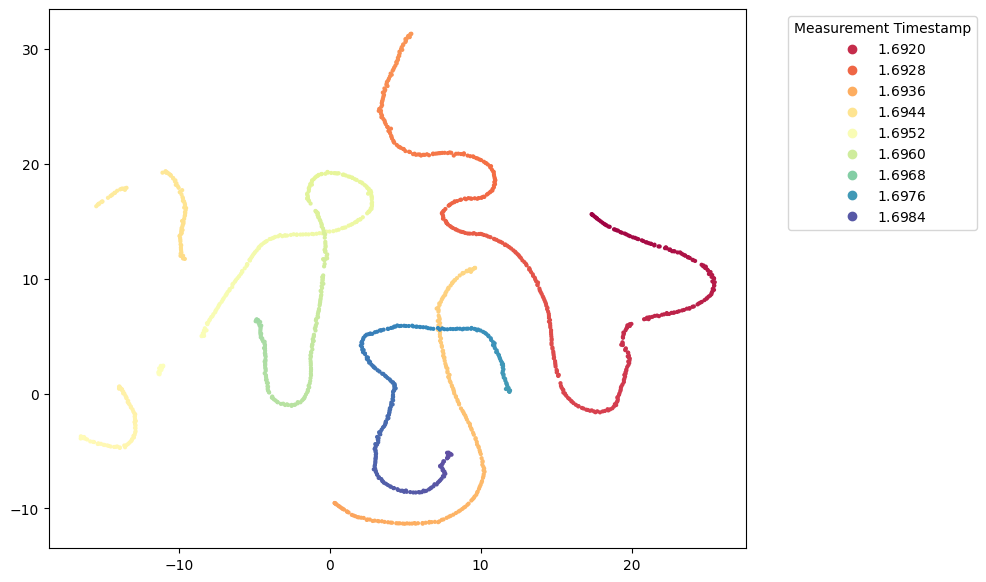

In [162]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=encoded_data_pre['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

## Finding the patterens with respect to the beaches:

KeyError: ignored

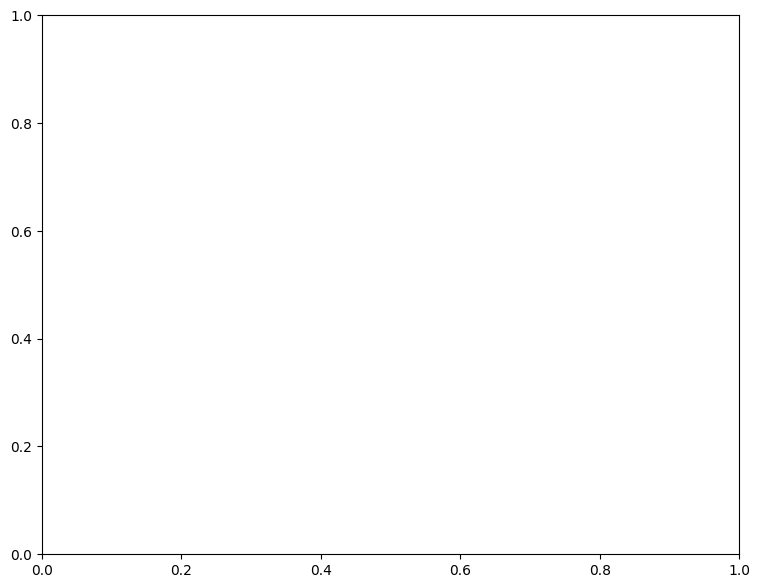

In [50]:
fig, ax = plt.subplots(figsize=(9, 7))

beach_names = ['Beach Name_63rd Street Beach', 'Beach Name_Calumet Beach', 'Beach Name_Montrose Beach',
               'Beach Name_Ohio Street Beach', 'Beach Name_Osterman Beach', 'Beach Name_Rainbow Beach']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Create a scatter plot of the UMAP embedding
for i, beach in enumerate(beach_names):
    indices = encoded_data_pre[beach].astype(bool)
    plt.scatter(umap_result[indices, 0], umap_result[indices, 1], s=4,color=colors[i], label=beach)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [163]:
encoded_data_pre

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Beach Name_Ohio Street Beach
0,1.691492e+09,0.0,0.0,-0.180535,0.089819,0.557703,1
1,1.691496e+09,0.0,0.0,-0.104153,0.089819,0.428491,1
2,1.691500e+09,0.0,0.0,-0.104153,0.089819,0.557703,1
3,1.691503e+09,0.0,0.0,-0.180535,-1.084181,0.557703,1
4,1.691507e+09,0.0,0.0,-0.104153,0.089819,0.299279,1
...,...,...,...,...,...,...,...
1472,1.698516e+09,0.0,0.0,-1.020737,1.510976,-2.672603,1
1473,1.698520e+09,0.0,0.0,-1.020737,1.449187,-2.801815,1
1474,1.698523e+09,0.0,0.0,-1.020737,1.387397,-3.318664,1
1475,1.698527e+09,0.0,0.0,-1.020737,1.325608,-3.706301,1


In [52]:
encoded_data = pd.get_dummies(data_sorted, columns=['Beach Name'])
encoded_data

,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID,Beach Name_Ohio Street Beach
0,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100,1
1,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200,1
2,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300,1
3,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400,1
4,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500,1
...,...,...,...,...,...,...,...,...,...
1472,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800,1
1473,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900,1
1474,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000,1
1475,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100,1


#Using Label Encoder to convert categorical values into numeric

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
data_sorted

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500
...,...,...,...,...,...,...,...,...,...
1472,Ohio Street Beach,2023-10-28 18:00:00,-100000,-100000,0.00,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
1473,Ohio Street Beach,2023-10-28 19:00:00,-100000,-100000,0.00,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
1474,Ohio Street Beach,2023-10-28 20:00:00,-100000,-100000,0.00,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000
1475,Ohio Street Beach,2023-10-28 21:00:00,-100000,-100000,0.00,6.2,9.9,10/28/2023 21:00,OhioStreetBeach202310282100


In [176]:
data_sorted_label_enc = data_sorted
data_sorted_label_enc.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,2023-08-08 11:00:00,-100000,-100000,0.11,4.2,13.2,8/8/2023 11:00,OhioStreetBeach202308081100
1,Ohio Street Beach,2023-08-08 12:00:00,-100000,-100000,0.12,4.2,13.1,8/8/2023 12:00,OhioStreetBeach202308081200
2,Ohio Street Beach,2023-08-08 13:00:00,-100000,-100000,0.12,4.2,13.2,8/8/2023 13:00,OhioStreetBeach202308081300
3,Ohio Street Beach,2023-08-08 14:00:00,-100000,-100000,0.11,2.3,13.2,8/8/2023 14:00,OhioStreetBeach202308081400
4,Ohio Street Beach,2023-08-08 15:00:00,-100000,-100000,0.12,4.2,13.0,8/8/2023 15:00,OhioStreetBeach202308081500


In [177]:
lblEn = LabelEncoder()

data_sorted_label_enc['Beach Name'] =lblEn.fit_transform(data_sorted_label_enc['Beach Name'])

In [166]:
lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted_label_enc['Beach Name'].unique()

array([0.])

In [173]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [178]:
data_sorted_label_enc = data_sorted_label_enc.drop(columns=['Measurement Timestamp Label','Measurement ID'])

Standardizing the numeric columns

In [179]:
scaler = StandardScaler()
data_sorted_label_enc[num_cols] = scaler.fit_transform(data_sorted_label_enc[num_cols])

In [61]:
# timeseries_data = data_sorted_label_enc['Measurement Timestamp']

In [62]:
# reference_time = timeseries_data.min()
# data_sorted_label_enc['Measurement Timestamp'] = (timeseries_data - reference_time).dt.total_seconds() / 60
# data_sorted_label_enc.isna().sum()

### Converting the timestamp to numerical values

In [180]:
data_sorted_label_enc['Measurement Timestamp'] = data_sorted_label_enc['Measurement Timestamp'].apply(lambda x: x.timestamp())

In [181]:
data_sorted_label_enc['Measurement Timestamp']

0       1.691492e+09
1       1.691496e+09
2       1.691500e+09
3       1.691503e+09
4       1.691507e+09
            ...     
1472    1.698516e+09
1473    1.698520e+09
1474    1.698523e+09
1475    1.698527e+09
1476    1.698530e+09
Name: Measurement Timestamp, Length: 1477, dtype: float64

In [65]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted_label_enc) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

data_sorted_label_enc=pd.DataFrame(data=np.round(new_array), columns=data_sorted_label_enc.columns)

In [182]:
# Apply UMAP to the entire DataFrame
SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 3,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted_label_enc)

umap_result

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[ 5.79121   ,  0.24245583,  6.5054655 ],
       [ 5.64925   ,  0.10068099,  6.590141  ],
       [ 5.694107  ,  0.14513676,  6.6330643 ],
       ...,
       [-4.712848  ,  9.685167  ,  5.424445  ],
       [-4.7413645 ,  9.770215  ,  5.3471828 ],
       [-4.9099426 ,  9.848063  ,  5.2271996 ]], dtype=float32)

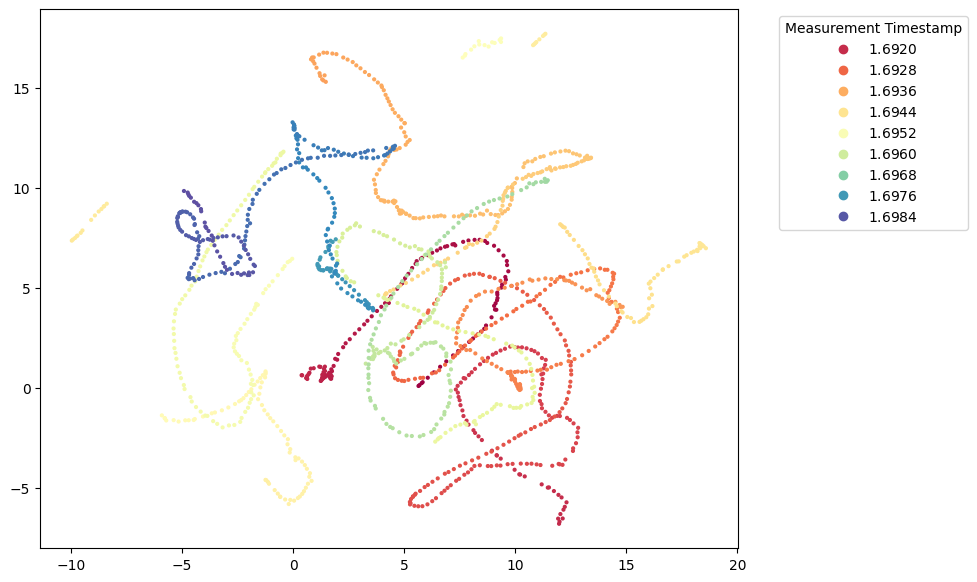

In [183]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

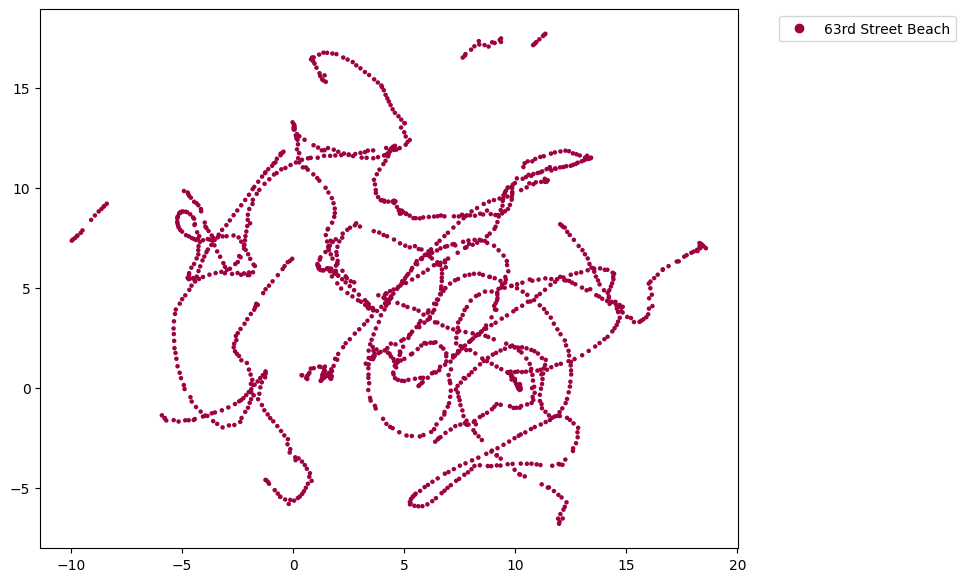

In [184]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted_label_enc['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

### Exporting data for the paraview.

In [185]:
data_sorted_label_enc

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0,1.691492e+09,0.0,0.0,-0.180535,0.089819,0.557703
1,0,1.691496e+09,0.0,0.0,-0.104153,0.089819,0.428491
2,0,1.691500e+09,0.0,0.0,-0.104153,0.089819,0.557703
3,0,1.691503e+09,0.0,0.0,-0.180535,-1.084181,0.557703
4,0,1.691507e+09,0.0,0.0,-0.104153,0.089819,0.299279
...,...,...,...,...,...,...,...
1472,0,1.698516e+09,0.0,0.0,-1.020737,1.510976,-2.672603
1473,0,1.698520e+09,0.0,0.0,-1.020737,1.449187,-2.801815
1474,0,1.698523e+09,0.0,0.0,-1.020737,1.387397,-3.318664
1475,0,1.698527e+09,0.0,0.0,-1.020737,1.325608,-3.706301


In [186]:
# Creating the dataframe from the array umap_result
umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])

In [187]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted_label_enc_out = pd.concat([data_sorted_label_enc,umap_result_df], axis=1)

In [188]:
# Exporting the csv file
data_sorted_label_enc_out.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/processed_files/new_data_sorted_label_enc_out.csv")

In [189]:
data_sorted_label_enc_out

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,UMAP-0,UMAP-1,UMAP-2
0,0,1.691492e+09,0.0,0.0,-0.180535,0.089819,0.557703,5.791210,0.242456,6.505466
1,0,1.691496e+09,0.0,0.0,-0.104153,0.089819,0.428491,5.649250,0.100681,6.590141
2,0,1.691500e+09,0.0,0.0,-0.104153,0.089819,0.557703,5.694107,0.145137,6.633064
3,0,1.691503e+09,0.0,0.0,-0.180535,-1.084181,0.557703,5.835950,0.289453,6.659952
4,0,1.691507e+09,0.0,0.0,-0.104153,0.089819,0.299279,6.065635,0.511904,6.741061
...,...,...,...,...,...,...,...,...,...,...
1472,0,1.698516e+09,0.0,0.0,-1.020737,1.510976,-2.672603,-4.598083,9.512204,5.658271
1473,0,1.698520e+09,0.0,0.0,-1.020737,1.449187,-2.801815,-4.674968,9.603061,5.549678
1474,0,1.698523e+09,0.0,0.0,-1.020737,1.387397,-3.318664,-4.712848,9.685167,5.424445
1475,0,1.698527e+09,0.0,0.0,-1.020737,1.325608,-3.706301,-4.741364,9.770215,5.347183


## Getting the sample of data

In [74]:
import pandas as pd

In [190]:
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/processed_files/data_sorted_label_enc_out.csv")
sample_data = data.sample(n=1500)
sample_data.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/processed_files/data_sorted_label_enc_out_sample.csv")